In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('../input/best-artworks-of-all-time/artists.csv')
df.head(5)

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [3]:
df['paintings'].sum()

8446

In [4]:
# remove columns that contains multiple artistic current
df = df[~df.genre.str.contains(',')]

# keep only interesting columns
df = df.drop(columns = ['id', 'years', 'bio', 'wikipedia'])

In [5]:
# check if numbers of paintings in dataframe match with number of files stored in folder
path, dirs, files = next(os.walk("../input/best-artworks-of-all-time/images/images/Amedeo_Modigliani"))
file_count = len(files)
file_count

df['paintings'][0] == file_count

True

## DataFrame Creation

In [6]:
artist = []
current = []
path_art = []
FOLDER = '../input/best-artworks-of-all-time/resized/resized/'

for name, genre, row in zip(df['name'], df['genre'], df['paintings']):
    nb_painting = 0
    while nb_painting < row:
        nb_painting += 1
        artist.append(name)
        current.append(genre)
        path_art.append(FOLDER + str(name) + '_' + str(nb_painting) + '.jpg')
        
data = {'artist': artist, 'genre': current, 'jpg': path_art}

In [7]:
df2 = pd.DataFrame(data)
df2.head(5)

,artist,genre,jpg
0,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
1,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
2,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
3,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
4,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...


In [8]:
df2['jpg'] = df2['jpg'].str.replace(' ', '_')

JPEG
RGB
(174, 484)


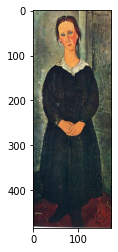

In [9]:
# load the image
image = Image.open(df2['jpg'][0])

# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)

# show the image
plt.imshow(image)

In [10]:
# export dataset
df2.to_csv('paintings_informations.csv', index=False)

## Machine Learning

In [11]:
df2.head()

,artist,genre,jpg
0,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
1,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
2,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
3,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...
4,Amedeo Modigliani,Expressionism,../input/best-artworks-of-all-time/resized/res...


In [12]:
df2.shape

(6669, 3)

In [13]:
df2.genre.unique()

array(['Expressionism', 'Impressionism', 'Surrealism', 'Byzantine Art',
       'Post-Impressionism', 'Northern Renaissance', 'Suprematism',
       'Symbolism', 'Cubism', 'Baroque', 'Romanticism', 'Mannerism',
       'Primitivism', 'Proto Renaissance', 'Early Renaissance',
       'High Renaissance', 'Realism', 'Neoplasticism', 'Pop Art',
       'Abstract Expressionism'], dtype=object)

In [14]:
len(df2.genre.unique())

20

In [15]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers


In [16]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [17]:
train_generator=datagen.flow_from_dataframe(
dataframe=df2,
directory=None,
x_col="jpg",
y_col="genre",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

valid_generator=datagen.flow_from_dataframe(
dataframe=df2,
directory=None,
x_col="jpg",
y_col="genre",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=df2,
directory=None,
x_col="jpg",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224))

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 419 invalid image filename(s) in x_col="jpg". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 4688 validated image filenames belonging to 20 classes.
Found 1562 validated image filenames belonging to 20 classes.
Found 6250 validated image filenames.


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 419 invalid image filename(s) in x_col="jpg". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 419 invalid image filename(s) in x_col="jpg". These filename(s) will be ignored.
  .format(n_invalid, x_col)


### Building model

In [18]:
from keras.applications import ResNet50
input_shape = (224,224,3)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 5s 0us/step


In [19]:
from keras import layers

In [20]:
model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(len(df2.genre.unique()), activation='softmax'),
])

In [21]:
# Freeze core ResNet layers
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

In [22]:
from keras import losses 
from keras import optimizers

model.compile(
      loss=losses.CategoricalCrossentropy(),
      optimizer=optimizers.Adam(),
      metrics=["accuracy"]
  )

In [23]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.01,
    restore_best_weights=True,
    )

In [24]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [25]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
146/146 [==============================] - 1756s 12s/step - loss: 2.4145 - accuracy: 0.3822 - val_loss: 3.7610 - val_accuracy: 0.0000e+00
Epoch 2/10
146/146 [==============================] - 1718s 12s/step - loss: 1.7454 - accuracy: 0.5289 - val_loss: 4.7568 - val_accuracy: 0.0000e+00
Epoch 3/10
146/146 [==============================] - 1665s 11s/step - loss: 1.3843 - accuracy: 0.6265 - val_loss: 6.5366 - val_accuracy: 0.0000e+00
Epoch 4/10
146/146 [==============================] - 1668s 11s/step - loss: 1.0967 - accuracy: 0.6975 - val_loss: 3.2956 - val_accuracy: 0.0326
Epoch 5/10
146/146 [==============================] - 1683s 12s/step - loss: 0.7709 - accuracy: 0.7976 - val_loss: 4.6633 - val_accuracy: 0.0013
Epoch 6/10
146/146 [==============================] - 1671s 11s/step - loss: 0.4835 - accuracy: 0.8816 - val_loss: 3.5087 - val_accuracy: 0.0397
Epoch 7/10
146/146 [==============================] - 1673s 11s/step - loss: 0.2761 - accuracy: 0.9407 - val_loss: 3.9

In [26]:
# history =  model.fit(
#             x=train_data,
#             epochs=10,
#             validation_data=val_data,
#             validation_freq=1, # check validation metrics every epoch
#             verbose=1,
#             callbacks=[early_stopping])

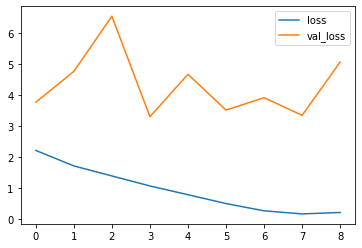

In [27]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

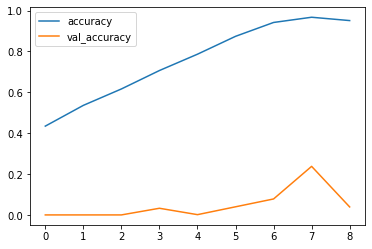

In [28]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();